<a href="https://colab.research.google.com/github/aminul01-g/pytorch/blob/main/Build_ANN_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [6]:
# Set random seeds for reproducibility

torch.manual_seed(42)

In [9]:
df = pd.read_csv('fmnist_small.csv')

df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,...,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


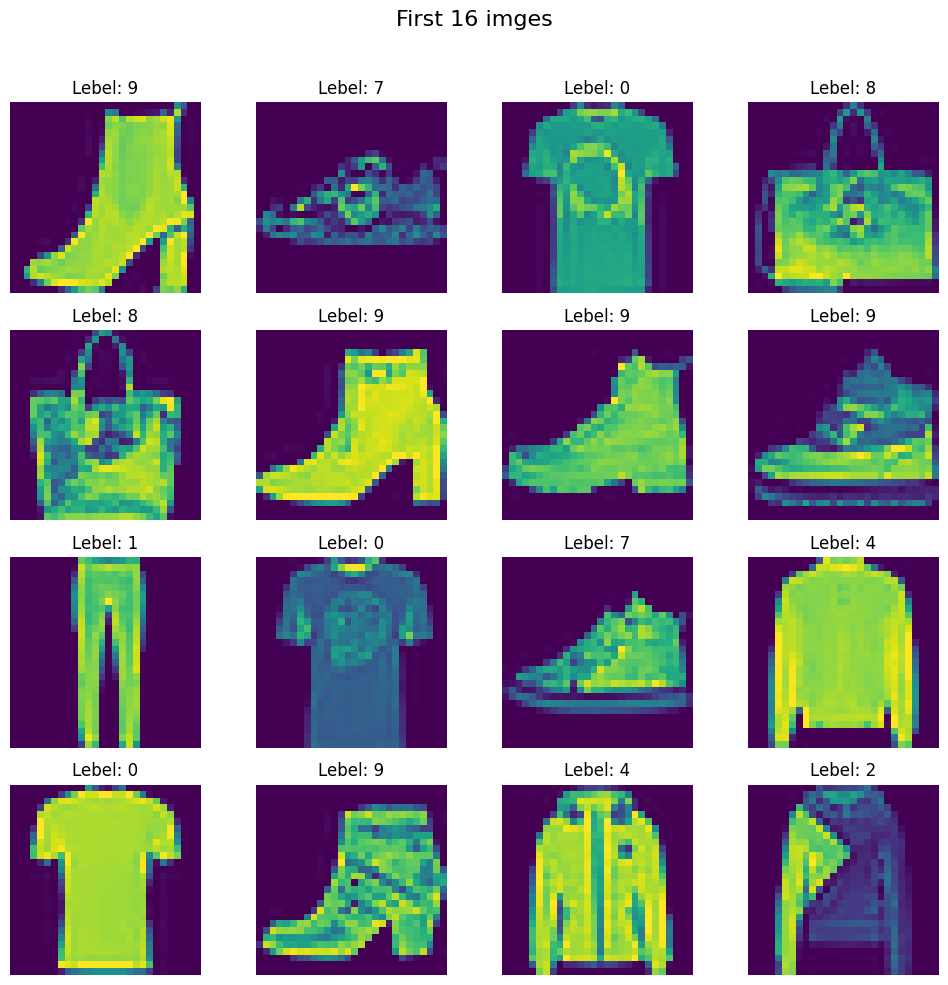

In [10]:
# Create a 4*4 grid of images
fig, axes = plt.subplots(4,4, figsize = (10,10))
fig.suptitle("First 16 imges", fontsize = 16)

# Plot the first 16 imges from the dataset
for i, ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28, 28) # Reshape to 28*28
  ax.imshow(img) # Display in grayscale
  ax.axis('off') # Remove axis for a cleaner look
  ax.set_title(f"Lebel: {df.iloc[i,0]}") # Show the label

plt.tight_layout(rect=[0,0,1,0.96]) # Adjust Layout to fit the title
plt.show()

# Train Test Split

In [11]:
x = df.iloc[:,1:].values
y = df.iloc[:, 0].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Scale the feautures

In [14]:
x_train = x_train/255.0
x_test = x_test/255.0

# Dataset

In [15]:
class customDataset(Dataset):
  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype = torch.float32)
    self.labels = torch.tensor(labels, dtype = torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [16]:
# Create train_dataset Object

train_dataset = customDataset(x_train, y_train)

In [17]:
len(train_dataset)

4800

In [18]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [19]:
# Ceate test_dataset Object

test_dataset = customDataset(x_test, y_test)

# DataLoad

In [31]:
# Create train and test loader

train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle = False)

# Create NN

In [40]:
class myNN(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )

  def forward(self, x):

      return self.model(x)


In [41]:
# Set Learning Rate & Epochs

epochs = 100
learning_rate = 0.1

In [42]:
# Instatiate the Model
model = myNN(x_train.shape[1])

# Loss Function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [44]:
len(train_loader)

75

# Model Train

In [47]:
for epochs in range (epochs):

  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:

    # Forward pass

    outputs = model(batch_features)

    # Calculate Loss

    loss = criterion(outputs, batch_labels)
    total_epoch_loss += loss.item()

    # Zero the grads

    optimizer.zero_grad()

    # Back Pass

    loss.backward()

    # Update grads

    optimizer.step()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f"Epoch: {epochs+1}, Loss: {avg_loss:.4f}")

Epoch: 1, Loss: 0.0005
Epoch: 2, Loss: 0.0005
Epoch: 3, Loss: 0.0005
Epoch: 4, Loss: 0.0005
Epoch: 5, Loss: 0.0005
Epoch: 6, Loss: 0.0005
Epoch: 7, Loss: 0.0005
Epoch: 8, Loss: 0.0005
Epoch: 9, Loss: 0.0005
Epoch: 10, Loss: 0.0005
Epoch: 11, Loss: 0.0005
Epoch: 12, Loss: 0.0005
Epoch: 13, Loss: 0.0005
Epoch: 14, Loss: 0.0005
Epoch: 15, Loss: 0.0005
Epoch: 16, Loss: 0.0005
Epoch: 17, Loss: 0.0005
Epoch: 18, Loss: 0.0005
Epoch: 19, Loss: 0.0005
Epoch: 20, Loss: 0.0005
Epoch: 21, Loss: 0.0005
Epoch: 22, Loss: 0.0005
Epoch: 23, Loss: 0.0005
Epoch: 24, Loss: 0.0005
Epoch: 25, Loss: 0.0005
Epoch: 26, Loss: 0.0005
Epoch: 27, Loss: 0.0005
Epoch: 28, Loss: 0.0005
Epoch: 29, Loss: 0.0005
Epoch: 30, Loss: 0.0004
Epoch: 31, Loss: 0.0004
Epoch: 32, Loss: 0.0004
Epoch: 33, Loss: 0.0004
Epoch: 34, Loss: 0.0004
Epoch: 35, Loss: 0.0004
Epoch: 36, Loss: 0.0004
Epoch: 37, Loss: 0.0004
Epoch: 38, Loss: 0.0004
Epoch: 39, Loss: 0.0004
Epoch: 40, Loss: 0.0004
Epoch: 41, Loss: 0.0004
Epoch: 42, Loss: 0.0004
E

# Evaluation

In [ ]:
model.eval()

In [52]:
total = 0
correct = 0

with torch.no_grad():

    for batch_features, batch_labels in test_loader:

        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)  # Get class indices

        total += batch_labels.size(0)
        correct += (predicted == batch_labels).sum().item()

print(correct / total)


0.8483333333333334
